## Regression on the California Housing Values dataset with scikit-learn
by [Zahra Taheri](https://github.com/zata213/Applied_Machine_Learning_S20_Assignments) (5 June 2020)

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('axes', labelsize=10)
mpl.rc('xtick', labelsize=10)
mpl.rc('ytick', labelsize=10)

import dabl

# to make this notebook's output identical at every run
np.random.seed(42)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Reading the dataset

In [2]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


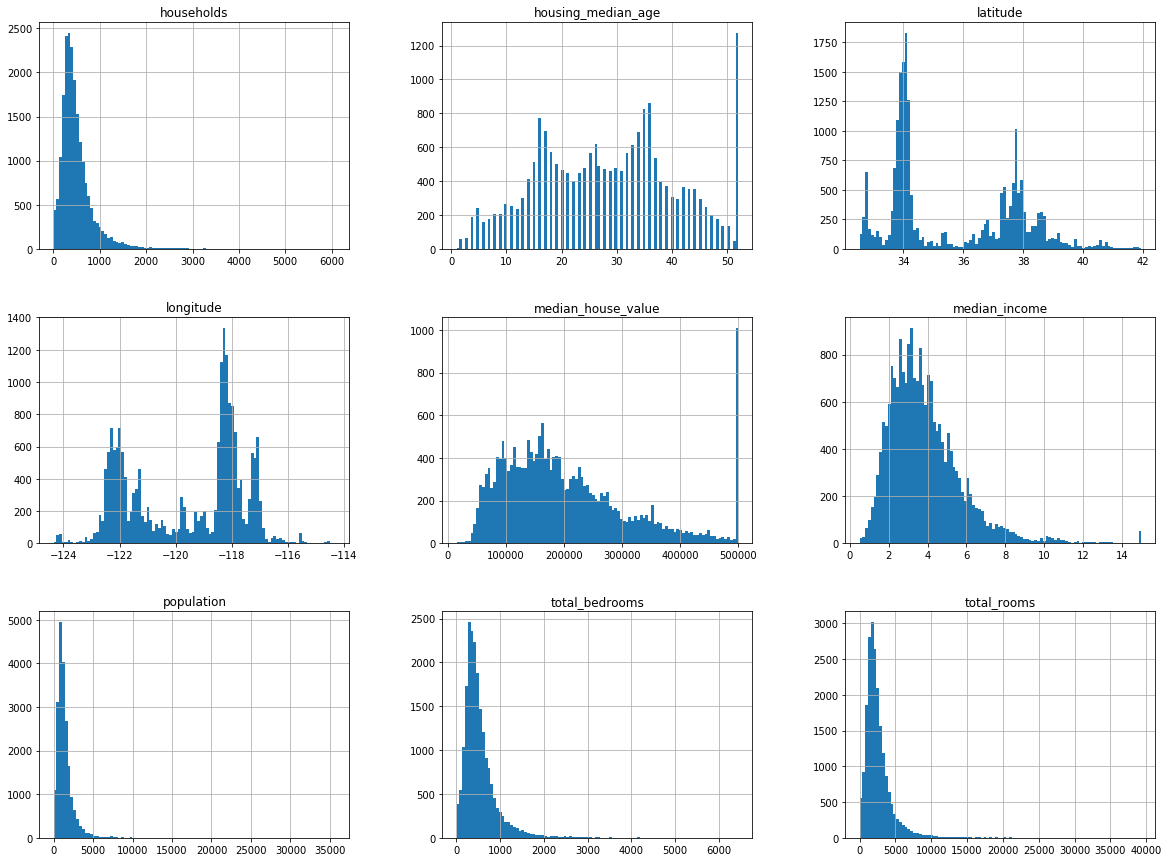

In [8]:
data.hist(bins=100, figsize=(20,15))

plt.show()

Target looks like regression


D:\anaconda3\envs\py38\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 64 outliers in column total_rooms.
  warn("Dropped {} outliers in column {}.".format(
D:\anaconda3\envs\py38\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 50 outliers in column households.
  warn("Dropped {} outliers in column {}.".format(
D:\anaconda3\envs\py38\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 49 outliers in column total_bedrooms.
  warn("Dropped {} outliers in column {}.".format(
D:\anaconda3\envs\py38\lib\site-packages\dabl\plot\utils.py:620: UserWarning: Dropped 48 outliers in column population.
  warn("Dropped {} outliers in column {}.".format(


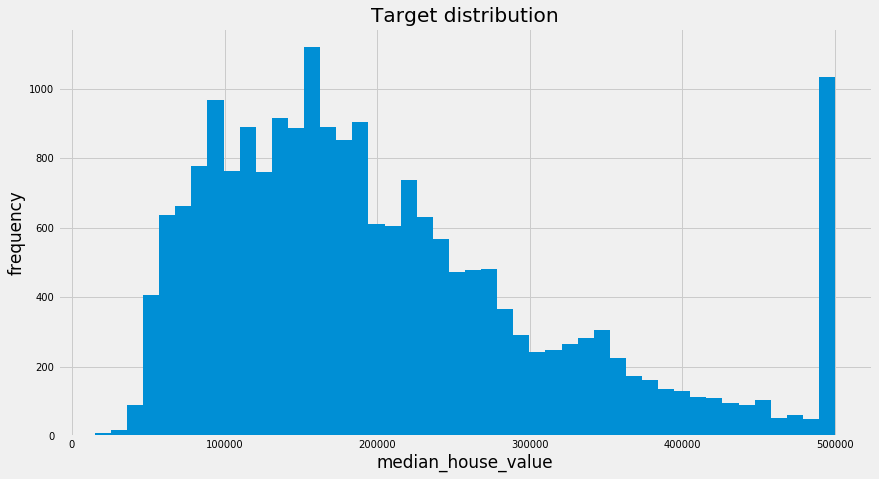

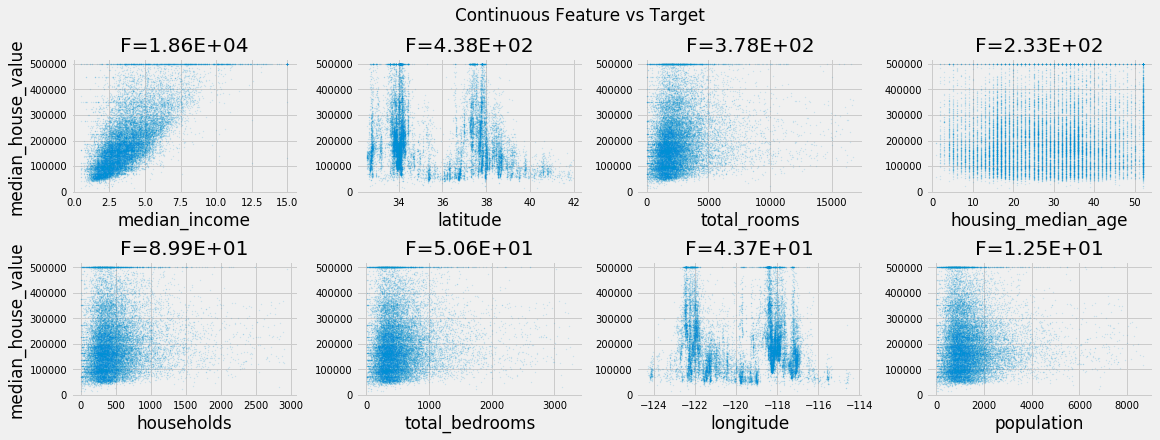

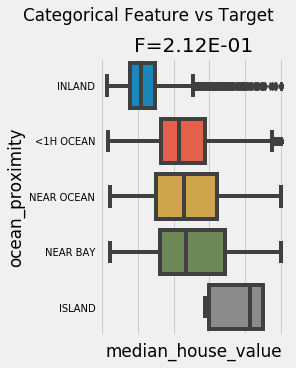

In [9]:
#Comparison of all other attributes with respect to median_house_value column

plt.rcParams['figure.figsize'] = (13,7)
plt.style.use('fivethirtyeight')
dabl.plot(data, target_col = 'median_house_value')

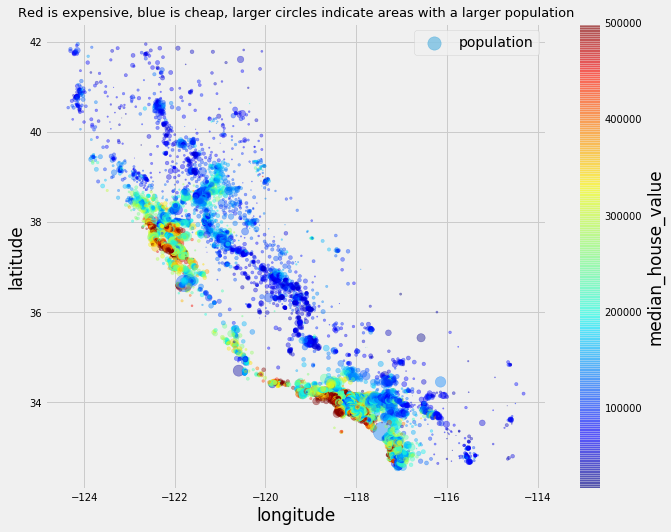

In [10]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [11]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [12]:
#from pandas.plotting import scatter_matrix

#attributes = ["median_house_value", "median_income", "total_rooms",
             # "housing_median_age"]
#scatter_matrix(data[attributes], figsize=(12, 8))

[0, 16, 0, 550000]

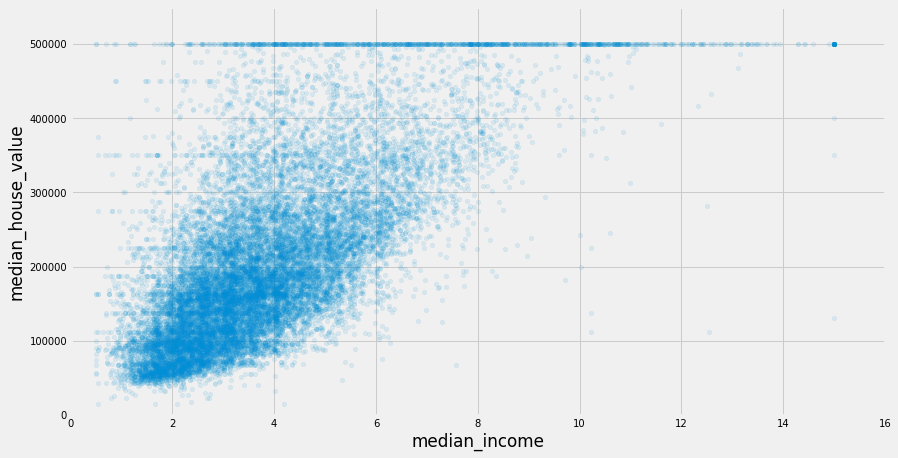

In [13]:
data.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1)
plt.axis([0, 16, 0, 550000])

## Data Cleaning and Preparation

In [14]:
types = dabl.detect_types(data)
types

,continuous,dirty_float,low_card_int,categorical,date,free_string,useless
longitude,True,False,False,False,False,False,False
latitude,True,False,False,False,False,False,False
housing_median_age,False,False,True,False,False,False,False
total_rooms,True,False,False,False,False,False,False
total_bedrooms,True,False,False,False,False,False,False
population,True,False,False,False,False,False,False
households,True,False,False,False,False,False,False
median_income,True,False,False,False,False,False,False
median_house_value,True,False,False,False,False,False,False
ocean_proximity,False,False,False,True,False,False,False


In [15]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [16]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [17]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [18]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [19]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [20]:
corr_matrix = data_num_clean.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049457
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.233303
Name: median_house_value, dtype: float64

In [21]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]
data_cat.head(10)

,ocean_proximity
0,NEAR BAY
1,NEAR BAY
2,NEAR BAY
3,NEAR BAY
4,NEAR BAY
5,NEAR BAY
6,NEAR BAY
7,NEAR BAY
8,NEAR BAY
9,NEAR BAY


In [22]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)
data_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [23]:
#ordinal_encoder.categories_

In [24]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse=False)
data_cat_1hot = cat_encoder.fit_transform(data_cat)
data_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [25]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [26]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [27]:
#Splitting the dependent and independent variables

X = data_clean.iloc[:,:12]
y = data_clean.iloc[:,12]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [28]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(16512, 12)
(16512,)
(4128, 12)
(4128,)


In [29]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler()
X_train = std_scale.fit_transform(X_train)
X_test = std_scale.fit_transform(X_test)

#minmax_scale = preprocessing.MinMaxScaler()
#X_train = minmax_scale.fit_transform(X_train)
#X_test = minmax_scale.fit_transform(X_test)

## Select and train models

#### Automatic modelling using `dabl`

In [31]:
dabl_reg = dabl.SimpleRegressor(random_state=0)
dabl_reg.fit(X_train,y_train) 

Running DummyRegressor()
r2: -0.000 neg_mean_squared_error: -2.006
=== new best DummyRegressor() (using r2):
r2: -0.000 neg_mean_squared_error: -2.006

Running DecisionTreeRegressor(max_depth=1)
r2: 0.217 neg_mean_squared_error: -1.571
=== new best DecisionTreeRegressor(max_depth=1) (using r2):
r2: 0.217 neg_mean_squared_error: -1.571

Running DecisionTreeRegressor(max_depth=5)
r2: 0.676 neg_mean_squared_error: -0.649
=== new best DecisionTreeRegressor(max_depth=5) (using r2):
r2: 0.676 neg_mean_squared_error: -0.649

Running Ridge(alpha=10)
r2: 0.134 neg_mean_squared_error: -1.737
Running Lasso(alpha=10)
r2: -0.000 neg_mean_squared_error: -2.006

Best model:
DecisionTreeRegressor(max_depth=5)
Best Scores:
r2: 0.676 neg_mean_squared_error: -0.649


SimpleRegressor(random_state=0, refit=True, shuffle=True, type_hints=None,
                verbose=1)

##### SVM Regressor, Decision Tree Regressor, SGD Regressor, Linear Regression  and Random Forrests Regressor

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import RandomForestRegressor

lin_reg = LinearRegression()
svm_reg = SVR(kernel="rbf",C=100,gamma=0.1,epsilon=.1)
tree_reg = DecisionTreeRegressor(max_depth=10, random_state=42)
sgd_reg = SGDRegressor(max_iter=15, tol=-np.infty, random_state=42)
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error

for reg in (svm_reg,tree_reg, sgd_reg, lin_reg, rf_reg):
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE of ", reg.__class__.__name__, rmse)

RMSE of  SVR 1.1248245490075728
RMSE of  DecisionTreeRegressor 0.8671106736482695
RMSE of  SGDRegressor 1.3520371852198585
RMSE of  LinearRegression 1.3317466689914665
RMSE of  RandomForestRegressor 0.7378610172749022


#### Multi-layer Perceptron Regressor and AdaBoost Regressor

In [34]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor


mlp_reg = MLPRegressor(hidden_layer_sizes=(200,200),learning_rate_init=0.01,early_stopping=True,random_state=42)

ada_reg = AdaBoostRegressor(
    DecisionTreeRegressor(max_depth=10), n_estimators=200,
    learning_rate=0.5, random_state=42)

estimators = [mlp_reg, ada_reg]

for reg in estimators:
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse=mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    print("RMSE of ", reg.__class__.__name__, rmse)

RMSE of  MLPRegressor 0.8985352371937145
RMSE of  AdaBoostRegressor 0.7486340748434459


#### Gradient Boosting Regressor

In [34]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

gb_reg=GradientBoostingRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, min_samples_leaf=3, max_features=1.0)
gb_reg.fit(X_train, y_train)

y_pred = gb_reg.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", gb_reg.__class__.__name__, rmse)

RMSE of  GradientBoostingRegressor 0.7470884976738025


#### XGBoost Regressor

In [35]:
from xgboost import XGBRegressor

xgb_reg=XGBRegressor(n_estimators=20, max_depth=10, random_state=42)
xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, rmse)

RMSE of  XGBRegressor 0.7472376855347846


In [31]:
from xgboost import XGBRegressor

xgb_reg=XGBRegressor(n_estimators=1000, learning_rate=0.05,n_jobs=2)
xgb_reg.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test,y_test)])

#y_pred = xgb_reg.predict(X_test)

#mse=mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#print("RMSE of ", xgb_reg.__class__.__name__, rmse)

[0]	validation_0-rmse:1.53213
Will train until validation_0-rmse hasn't improved in 5 rounds.
[1]	validation_0-rmse:1.47292
[2]	validation_0-rmse:1.41782
[3]	validation_0-rmse:1.36652
[4]	validation_0-rmse:1.31801
[5]	validation_0-rmse:1.27376
[6]	validation_0-rmse:1.23296
[7]	validation_0-rmse:1.19579
[8]	validation_0-rmse:1.16111
[9]	validation_0-rmse:1.12847
[10]	validation_0-rmse:1.09907
[11]	validation_0-rmse:1.06934
[12]	validation_0-rmse:1.04410
[13]	validation_0-rmse:1.02074
[14]	validation_0-rmse:1.00011
[15]	validation_0-rmse:0.98155
[16]	validation_0-rmse:0.96275
[17]	validation_0-rmse:0.94730
[18]	validation_0-rmse:0.93368
[19]	validation_0-rmse:0.91993
[20]	validation_0-rmse:0.90626
[21]	validation_0-rmse:0.89482
[22]	validation_0-rmse:0.88438
[23]	validation_0-rmse:0.87481
[24]	validation_0-rmse:0.86503
[25]	validation_0-rmse:0.85564
[26]	validation_0-rmse:0.84719
[27]	validation_0-rmse:0.83849
[28]	validation_0-rmse:0.83124
[29]	validation_0-rmse:0.82476
[30]	validation_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [34]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

xgb_reg=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, monotone_constraints='()',
             n_estimators=1000, n_jobs=2, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

xgb_reg.fit(X_train, y_train)

y_pred = xgb_reg.predict(X_test)

mse=mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE of ", xgb_reg.__class__.__name__, rmse)

RMSE of  XGBRegressor 0.7513259622620713


### The system specifications used in these regressions are as follows:
- System Model: HP Pavilion 15 Notebook PC
- Operating System: Windows 10 Pro 64-bit
- Processor: Intel(R) Core(TM) i7-4500U CPU @ 1.80GHz (4 CPUs), ~2.4GHz
- Memory: 8192MB RAM